# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Perform API Calls
#Perform weather check on each city using a series of successive API calls
#Include a print log of each city as it's being process (with the city number and name)
#setup lists to hold response info
record = 0
sets = 1
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#response = requests.get(query_url + city).json()
#get list of cities and perform a request for data on each
for city in cities:
    record += 1
    
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    query = base_url + "appid=" + weather_api_key + '&units=imperial' + "&q=" + city
    
    try:
        response = requests.get(query)
        city_json = response.json()
        cityname.append(city_json['name'])
        cloudiness.append(city_json['clouds']['all'])
        country.append(city_json['sys']['country'])
        date.append(city_json['dt'])
        humidity.append(city_json['main']['humidity'])
        lat.append(city_json['coord']['lat'])
        lng.append(city_json['coord']['lon'])
        max_temp.append(city_json['main']['temp_max'])
        wind_speed.append(city_json['wind']['speed'])
        if record == 50:
            sets = sets + 1
            record = 0
        print(f'Processing record {record} of Set {sets} | {city}')
    except:
        print(f"City not found. Skipping...")
        
print("End of data")
 


Processing record 1 of Set 1 | hilo
Processing record 2 of Set 1 | kaitangata
Processing record 3 of Set 1 | kungurtug
Processing record 4 of Set 1 | bathsheba
Processing record 5 of Set 1 | mataura
City not found. Skipping...
City not found. Skipping...
Processing record 8 of Set 1 | burgos
Processing record 9 of Set 1 | tomatlan
Processing record 10 of Set 1 | tiksi
Processing record 11 of Set 1 | new norfolk
City not found. Skipping...
Processing record 13 of Set 1 | tazovskiy
Processing record 14 of Set 1 | maningrida
Processing record 15 of Set 1 | arlit
Processing record 16 of Set 1 | havre-saint-pierre
Processing record 17 of Set 1 | arkhara
Processing record 18 of Set 1 | novomykolayivka
Processing record 19 of Set 1 | norfolk
Processing record 20 of Set 1 | qaanaaq
Processing record 21 of Set 1 | lebedinyy
Processing record 22 of Set 1 | pevek
Processing record 23 of Set 1 | brawley
Processing record 24 of Set 1 | wewak
Processing record 25 of Set 1 | cabo san lucas
Processing

Processing record 108 of Set 3 | jalu
Processing record 109 of Set 3 | byron bay
Processing record 110 of Set 3 | meiganga
Processing record 111 of Set 3 | belozerskoye
Processing record 112 of Set 3 | iqaluit
Processing record 113 of Set 3 | kaitong
Processing record 114 of Set 3 | terenos
Processing record 115 of Set 3 | wentzville
Processing record 116 of Set 3 | pacific grove
City not found. Skipping...
Processing record 118 of Set 3 | comodoro rivadavia
Processing record 119 of Set 3 | alnashi
Processing record 120 of Set 3 | jabinyanah
Processing record 121 of Set 3 | morondava
Processing record 122 of Set 3 | atasu
Processing record 123 of Set 3 | vostok
Processing record 124 of Set 3 | hailun
Processing record 125 of Set 3 | puerto escondido
Processing record 126 of Set 3 | vardo
Processing record 127 of Set 3 | fortuna
Processing record 128 of Set 3 | portland
Processing record 129 of Set 3 | gamay
City not found. Skipping...
Processing record 131 of Set 3 | kodiak
Processing 

Processing record 307 of Set 3 | coquimbo
City not found. Skipping...
Processing record 309 of Set 3 | brodnica
Processing record 310 of Set 3 | isla vista
Processing record 311 of Set 3 | bocas del toro
Processing record 312 of Set 3 | san juan de flores
Processing record 313 of Set 3 | walvis bay
Processing record 314 of Set 3 | hofn
Processing record 315 of Set 3 | nhulunbuy
Processing record 316 of Set 3 | linqiong
Processing record 317 of Set 3 | naryan-mar
Processing record 318 of Set 3 | taltal
Processing record 319 of Set 3 | bizhbulyak
Processing record 320 of Set 3 | yichang
Processing record 321 of Set 3 | matamoros
Processing record 322 of Set 3 | gladstone
City not found. Skipping...
Processing record 324 of Set 3 | severobaykalsk
Processing record 325 of Set 3 | garowe
Processing record 326 of Set 3 | jilin
Processing record 327 of Set 3 | pyay
Processing record 328 of Set 3 | quelimane
Processing record 329 of Set 3 | porto empedocle
Processing record 330 of Set 3 | moan

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Turn appended lists into dictionary
weather_dict = {'City':cityname,
                'Cloudiness':cloudiness,
                'Country':country,
                'Date':date,
                'Humidity':humidity,
                'Latitude':lat,
                'Longitude':lng,
                'Max Temp':max_temp,
                'Wind Speed':wind_speed}

weather_df = pd.DataFrame(weather_dict)

In [6]:
#export dataframe to csv
weather_df.to_csv('city_weather.csv', index = None, header = True)
#weather_df.to_csv(r'\my_weather_data.csv)


In [7]:
#counts for dataframe
weather_df.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Latitude      551
Longitude     551
Max Temp      551
Wind Speed    551
dtype: int64

In [8]:
#Display Dataframe head
weather_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Hilo,1,US,1618715756,54,19.7297,-155.0900,80.60,8.05
1,Kaitangata,56,NZ,1618716410,68,-46.2817,169.8464,59.00,3.00
2,Kungurtug,70,RU,1618716468,43,50.5994,97.5228,40.19,0.87
3,Bathsheba,40,BB,1618716468,61,13.2167,-59.5167,80.60,19.57
4,Mataura,50,NZ,1618716469,76,-46.1927,168.8643,57.99,15.99
5,Burgos,20,ES,1618716469,93,42.3394,-3.7079,30.20,3.44
6,Tomatlán,0,MX,1618716469,79,19.9333,-105.2500,66.90,2.68
7,Tiksi,100,RU,1618716427,80,71.6872,128.8694,9.84,7.09
8,New Norfolk,100,AU,1618716470,73,-42.7826,147.0587,63.00,4.00
9,Tazovsky,99,RU,1618716470,93,67.4667,78.7000,0.73,8.55


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The plot proves the cities closer to the equator have a higher temperature. The temperature drops the further away from the equator the cities are.


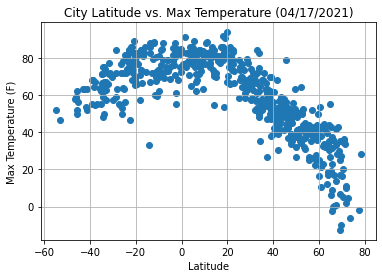

In [19]:
#Build scatter plot Temperature vs Latitude
#save the figure as .pngs
#show plot
today=time.strftime("%m/%d/%Y")
scatlat = weather_df["Latitude"]
scattemp = weather_df["Max Temp"]

plt.scatter(scatlat,scattemp)
plt.grid()
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('LatitudeMaxTemp.png')
print("The plot proves the cities closer to the equator have a higher temperature. The temperature drops the further away from the equator the cities are.") 


## Latitude vs. Humidity Plot

The plot proves the humidity varies the most in cities located in the 20-40 latitude with a gradual increase to a higher humidity the higher the latitude.


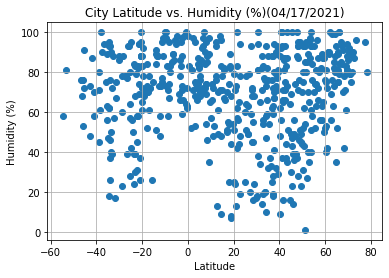

In [18]:
#Build the scatter plot for latitude vs humidity
#Save the figure
#Show plot

#scatlat = weather_df["Latitude"]
scathum = weather_df["Humidity"]

today=time.strftime("%m/%d/%Y")
plt.scatter(scatlat,scathum)
plt.grid()
plt.title(f"City Latitude vs. Humidity (%)({today})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('LatitudeHumidity.png')
print("The plot proves the humidity varies the most in cities located in the 20-40 latitude with a gradual increase to a higher humidity the higher the latitude.") 

## Latitude vs. Cloudiness Plot

The plot proves there is no pattern that can describe the relationship between latitude and cloudiness.


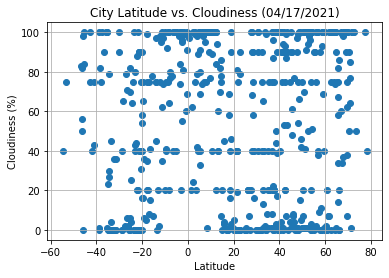

In [22]:
#Build the scatter plot for latitude vs cloudiness
#Save the figure
#Show plot

#scatlat = weather_df["Latitude"]
scatcloud = weather_df["Cloudiness"]

today=time.strftime("%m/%d/%Y")
plt.scatter(scatlat,scatcloud)
plt.grid()
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('LatitudeCloudiness.png')
print("The plot proves there is no pattern that can describe the relationship between latitude and cloudiness.")

## Latitude vs. Wind Speed Plot

This plot proves there is gradual increase in wind speed in cities with a higher latitude.


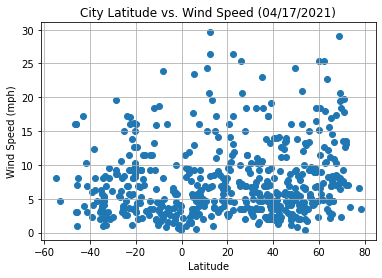

In [23]:
#Build the scatter plot for latitude vs humidity
#Save the figure
#Show plot

#scatlat = weather_df["Latitude"]
scatwind = weather_df["Wind Speed"]

today=time.strftime("%m/%d/%Y")
plt.scatter(scatlat,scatwind)
plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('LatitudeWindSpeed.png')
print("This plot proves there is gradual increase in wind speed in cities with a higher latitude.")


## Linear Regression

In [25]:
#Set up Northern and Southern Hemisphere Dataframes

#Northern Hemisphere (Lat >= 0)
weather_df_north = weather_df[weather_df['Latitude'] >= 0]

#Southern Hemisphere (Lat < 0)
weather_df_south = weather_df[weather_df['Latitude'] < 0]

weather_df_north.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Hilo,1,US,1618715756,54,19.7297,-155.0900,80.60,8.05
2,Kungurtug,70,RU,1618716468,43,50.5994,97.5228,40.19,0.87
3,Bathsheba,40,BB,1618716468,61,13.2167,-59.5167,80.60,19.57
5,Burgos,20,ES,1618716469,93,42.3394,-3.7079,30.20,3.44
6,Tomatlán,0,MX,1618716469,79,19.9333,-105.2500,66.90,2.68


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8844707243510238
The linear regression shows that as you move away from the equator the temperature decreases


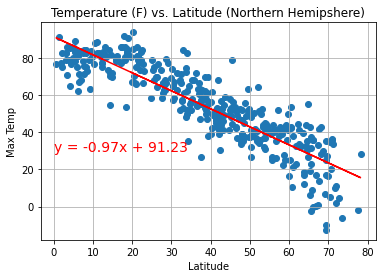

In [46]:
#Set up linear regression and line equation
x_values = weather_df_north['Latitude']
y_values = weather_df_north['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(0,30),fontsize=14,color="red")
plt.grid()
plt.title('Temperature (F) vs. Latitude (Northern Hemipshere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
print("The linear regression shows that as you move away from the equator the temperature decreases")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5584618154962588
The linear regression shows that as you get closer to the equator the temperature increases


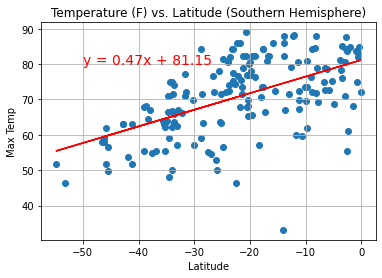

In [45]:
#Set up linear regression and line equation
x_values = weather_df_south['Latitude']
y_values = weather_df_south['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(-50,80),fontsize=14,color="red")
plt.grid()
plt.title('Temperature (F) vs. Latitude (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
print("The linear regression shows that as you get closer to the equator the temperature increases")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13404945371355215
The linear regression does not display much of a correlation between the data sets


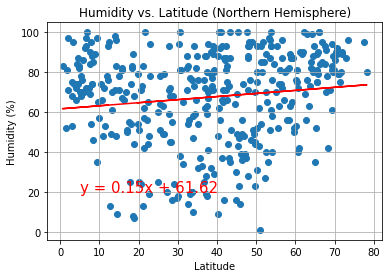

In [49]:
x_values = weather_df_north['Latitude']
y_values = weather_df_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(5,20),fontsize=15,color="red")
plt.grid()
plt.title('Humidity vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue}")
print("The linear regression does not display much of a correlation between the data sets")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13404945371355215
The linear regression does not display much of a correlation between the data sets


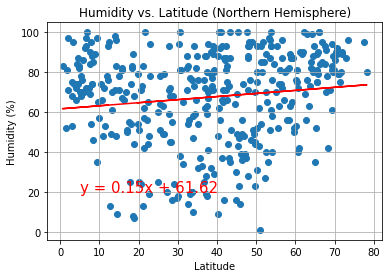

In [48]:
x_values = weather_df_north['Latitude']
y_values = weather_df_north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(5,20),fontsize=15,color="red")
plt.grid()
plt.title('Humidity vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue}")
print("The linear regression does not display much of a correlation between the data sets")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00440557095605374
The linear regression does not display much of a correlation between the data sets


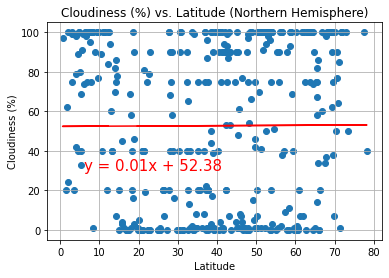

In [47]:
x_values = weather_df_north['Latitude']
y_values = weather_df_north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(6,30),fontsize=15,color="red")
plt.grid()
plt.title('Cloudiness (%) vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue}")
print("The linear regression does not display much of a correlation between the data sets")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2751205520219928
The regression does not display much of a correlation between the data sets


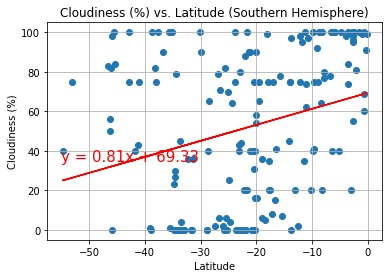

In [40]:
x_values = weather_df_south['Latitude']
y_values = weather_df_south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(-55,35),fontsize=15,color="red")
plt.grid()
plt.title('Cloudiness (%) vs. Latitude (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue}")
print("The linear regression does not display much of a correlation between the data sets")
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0936053209356981
The regression does not display much of a correlation between the data sets


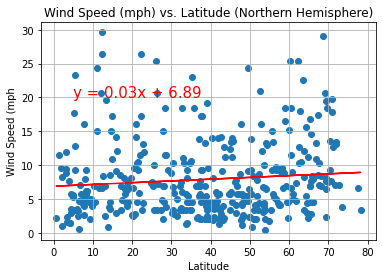

In [39]:
x_values = weather_df_north['Latitude']
y_values = weather_df_north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(5,20),fontsize=15,color="red")
plt.grid()
plt.title('Wind Speed (mph) vs. Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.09447672741627798
The regression does not display much of a correlation between the data sets


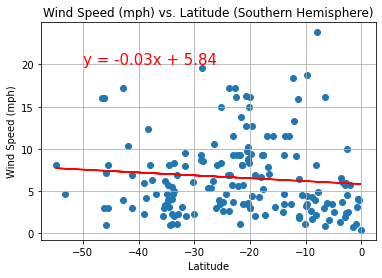

In [37]:
x_values = weather_df_south['Latitude']
y_values = weather_df_south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, xy=(-50,20),fontsize=15,color="red")
plt.grid()
plt.title('Wind Speed (mph) vs. Latitude (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets")
plt.show()